# Hand on the Quanvolution Neural Network
_by Ashraf Boussahi  -Algeria-_

## Introduction:
Quantum Machine Learning (QML) is an evolving field that aims to optimize and surpass the computability constraints of its classical counterpart. Although this domain is still under research and many questions are open, significant results have been achieved where successful translations from classical models to quantum ones have been accomplished, one of these remarkable models is the classical **Convolutional Neural Network (CNN)**, which is a well-known algorithm commonly used in computer vision tasks.

In a paper introduced by [Henderson et al in 2019](https://arxiv.org/abs/1904.04767) the **Quanvolutional Neural Networks (QNN)** were introduced to the QML community for the first time, this model aims to optimize mainly the feature maps calculations and reduce the training duration.
During this article, we will try to re-implement the paper results, explain and cut down the main pieces of knowledge into small ones for beginners, and follow the Pennylane demos presented by [Andrea Mari](https://pennylane.ai/qml/demos/tutorial_quanvolution/)
_Note: This article is a part of the final project at the Womanium Quantum + AI Scholarship Program, where we will dive into the world of Quantum Machine Learning. The only prerequisite here is a previous knowledge of the basics of Machine Learning and the fundamentals of Quantum Computing, as we will try to simplify the notions._

## What is a Convolutional Neural Network?

In the field of Machine Learning and Computer Vision, a **Convolutional Neural Network (CNN)** is a type of machine learning algorithm, specifically deep learning, designed with a particular architecture. Over the years, CNN has demonstrated strong results and has become the primary algorithm used for **image recognition** tasks. 

The CNN algorithm consists of two main types of layers:

- **Transformation & Features Extraction Layers:** These layers process the input data, which is a matrix representation of the input images, and apply various transformation layers (on the size and values) to extract feature maps. These feature maps then move on to the next type of layers.
  
- **Classification Layers:** This typically involves a traditional **Feed Forward Fully Connected Neural Network** with multiple layers, activation functions, and an output that provides the classification probabilistic vector based on the given problem.

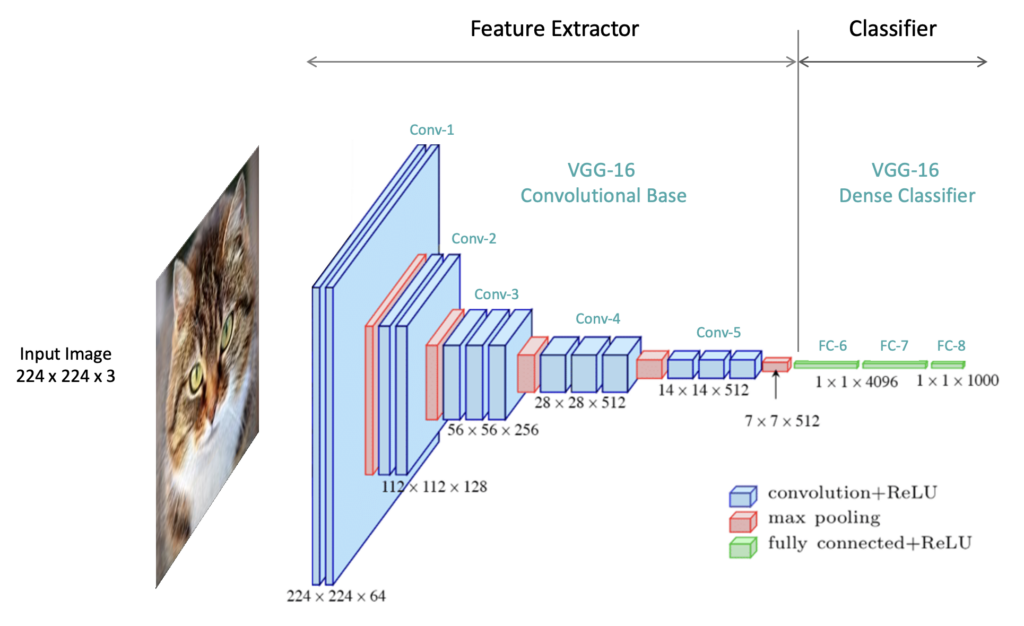

_Fig1: CNN architecture

_Credit: Convolutional Neural Network (CNN): A Complete Guide by Learn Open CV_


### What is inside the feature extraction layers? 

Two primary types of transformations can be applied to the matrix representation of input images:

- ***Convolution layer:*** This constitutes a fundamental block of the CNN architecture. For example, we consider a 28x28 pixel image, in this layer, we apply a smaller matrix known as a **kernel** also called **filter** (e.g. let's assume a 3x3 px kernel) across the input image starting from the **top right** and move down to the **bottom left** with a specific **step size** referred to as the **stride**. At each step, we perform a **matrix multiplication** operation between the **sub-matrix** of the input image (where the kernel is) and the **filter values**. After processing the entire image, the results give another matrix called the **feature map**. This operation is **repeated for all the kernels** we have, and the results are stored in a **tensor** (3D Matrix) where **each channel** represents the outcomes of the **convolution operation** of each kernel on the image


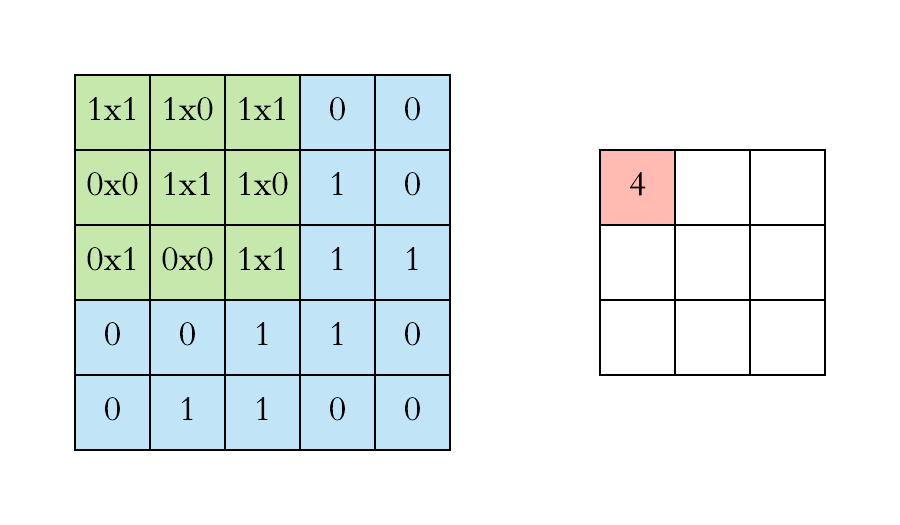

_Fig2: The Convolution layer in action_

_Credit: [Arden Derta: Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)_

- ***Pooling layer***: After applying the convolution operation, we can reduce the dimension and size of the feature map using techniques of pooling. One commonly used method is max-pooling, which involves replacing every group of pixels with their maximum value. This helps preserve the most important information in that group

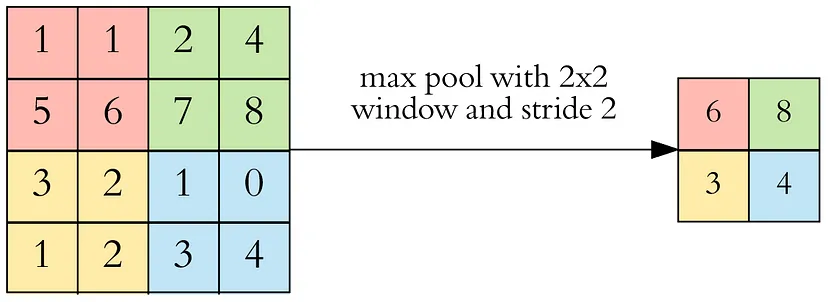

_Fig3: The Pooling Layer Application_

_Credit: [Arden Derta: Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)_
t



The two layers can be repeated multiple times, changing the depth of the network. After collecting all the feature maps, we flatten them and input them into a fully connected layer, which is a traditional neural network used to classify the image based on its feature maps. We can adjust the number and size of the hidden layers in the Fully Connected Layer. 
The output layer provides us with the probabilistic distribution vector for classification with a size equal to the number of classes in the input data.

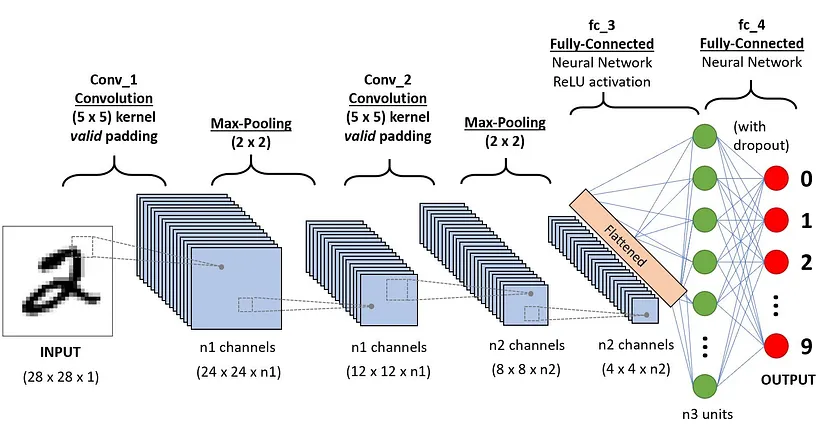

_Fig4: The Architecture of a CNN with two convolutional layers each followed by a max pooling layer and a classification layer_
_Credit: [A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way by Sumit Saha](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

You can read more on the convolutional Neural Networks by following the links associated with credits under each of the above figures.

## How can we emulate the CNN into a Quantum Model (QNN):

The explanation above highlights that the most time-consuming part of the process is **the kernel multiplication**. The Quantum Quanvolutinal Network concept aims to **replace** this classical operation with a quantum one. In this new approach, each result of multiplying a **kernel pixel value** with a **source image pixel value** is fed into a quantum device. The output of this process will generate a **feature map**. This feature map will function just like the classical one, indicating that this algorithm **in its general picture** is a **hybrid**, using both classical and quantum elements.

This method introduces a new type of layer called the Quanvolutional layer. the main difference between them and the Convolutional layers depends on the way the filters of each type perform their calculations.

Let us formalize the steps of the circuit application. We consider a quantum kernel, where the data that goes through it is a $2x2$ matrix, and we define the input with $U_x$.

**Step 01: Encoding**  
Several methods can be applied to encode each value into the quantum state, such as _Amplitude Encoding_ and _Angle Encoding_. We refer to this operation on each data sample $U_x$ with $i_x = e(U_x)$, where $e$ stands for encoding.

**Step 02: Calculation**  
For this, we will apply a random quantum circuit. In Pennylane, a random circuit consists of layers of randomly chosen single-qubit rotations and two-qubit entangling gates, acting on randomly chosen qubits. We will refer to this circuit as $q$, where its result is a quantum state $o_x$, which can be written as $o_x = q(i_x) = q(e(U_x))$.

**Step 03: Decoding**  
In this step, we will apply a finite set of measurements to extract classical information from the quantum circuit. Like encoding, several methods can be applied, and we will denote them with $d$, where $d(o_x) = d(q(e(U_x)))$ with $d$ stands for decoding.

The classical results we get are then concatenated into a set of feature maps that follow the same classical flow introduced above, involving pooling and going through other layers of convolution or even quanvolution since we have the flexibility to stack the layers no matter their nature.

The following figure describes the flow we discussed above:

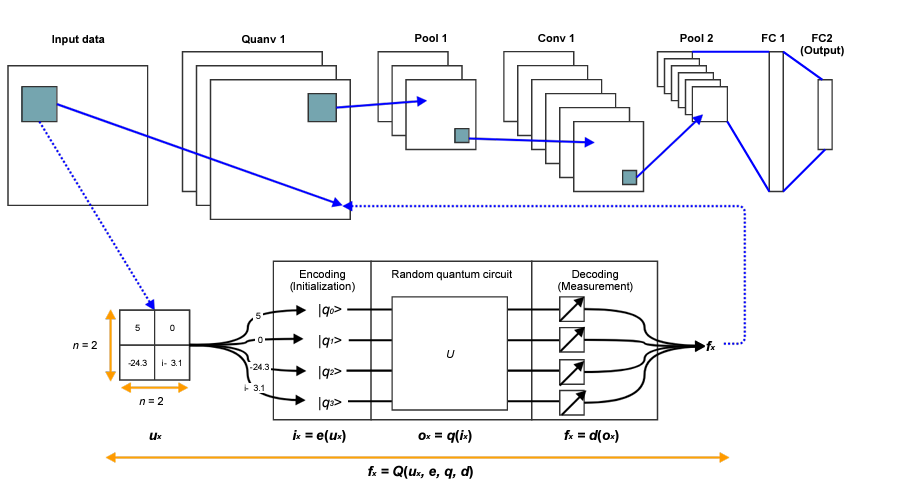

_Fig5: Quanvolutional Neural Network flow architecture and its relation with the classical flow_

_Credit: [Henderson et al in 2019](https://arxiv.org/abs/1904.04767)_

## Hand-on Application:
Let's write some code and apply what we have discussed using pennylane to classify the famous MNIST dataset of digits from 0 to 9:

First, we import the libraries we will need:

In [1]:
import pennylane as qml #Pennylane for Qunatum Circuits
from pennylane import numpy as np #Numpy for math calculations and matrices manipulation
from pennylane.templates import RandomLayers #To create random quantum circuits
import tensorflow as tf #Tenser Flow for Deep learning tasks
from tensorflow import keras #Keras for deep learning tasks.
import matplotlib.pyplot as plt #Matplotlib for plotting

np.random.seed(0) 
tf.random.set_seed(0) 
SAVE_PATH = "C:/Users/Client/Quanv/"  # Data saving folder

We load and visulaise the MNIST dataset from keras:

In [2]:
MNIST = keras.datasets.mnist


(train_images, train_labels), (test_images, test_labels) = MNIST.load_data() #We split tha dat into training and testing


# Normalize pixel values within 0 and 1
train_images = train_images[:50] / 255 #We divide by 255 because it's the maximum pixel value in an 8-bit grayscale image
test_images = test_images[:30] / 255 #We select few samples from the training and testing set

train_labels = train_labels[:50]
test_labels = test_labels[:30]

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False) #TenserFlow and keras requires the data tensor 
                                                                            #to be in the format (batch_size, height, width, channels) where in the
                                                                            #grayscale images the number of channels is one.
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)

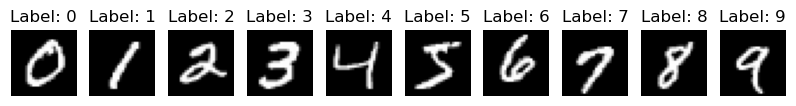

In [3]:
def plot_all_digits(images, labels):
    plt.figure(figsize=(10, 10))
    num_classes = 10
    
    plotted_digits = [False] * num_classes
    
    for i in range(len(images)):
        digit = labels[i]
        
        if not plotted_digits[digit]:
            plt.subplot(1, num_classes, digit + 1)
            plt.imshow(images[i].reshape(28, 28), cmap='gray')
            plt.title(f"Label: {digit}")
            plt.axis('off')
            plotted_digits[digit] = True
        
        if all(plotted_digits):
            break
            
    plt.show()


plot_all_digits(train_images, train_labels)

Now we will define the quantum circuit that will act like the quantum kernel (the qunavolution layer)

For that we need to define our quantum simulator device since we are using Pennylane, we will use a $2$x$2$ kernel so we will need a 4 qubits circuit

In [4]:
dev = qml.device("default.qubit", wires=4)

Following the flow we explained earlier, we will write the code for the step 1: The Encoding or The State Preparation, and we will use for the the _Angles Encoding_ were each value will be represented as a rotation on the Y axis of the qubit

In [5]:
def State_Preparation(U_x):
    for j in range(4):
        qml.RY(np.pi * U_x[j], wires=j) # After normalization 0<phi[j]<1 by multiplying by pi we will get 0 < phi[j] < pi  

In **Step 02:** we will process the encoded data through a 1 layer random circuit, we can achieve that through Pennylane using the RandomLayer function, and in **Step 03:** we need to decode the result through 4 measurements that will create the features map.

The random layer needs a set of random parameters, and as we said, the quantum random layer is built from random rotations gate so values need between $0$ and $2.\pi$

In [6]:
np.random.seed(0) 
tf.random.set_seed(0) 
num_layers = 1
rand_params = np.random.uniform(high = 2 * np.pi, size = (num_layers, 4)) # Uniform => so the random results are from the uniform distribution

@qml.qnode(dev)
def circuit(U_x):

    State_Preparation(U_x)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)] #The expected value of the Z basis results (-1 or 1 in each run) over many runs (shots)

Now, this circuit should be applied to all the images. We need to divide each input image into $2$×$2$ small matrices (in CNN vocabulary we used a 2x2 filter with a stride equal to 2). Each of these matrices will then be processed by the quantum circuit, and the 4 measurements we be directed a specific channel in the classical feature map

In [7]:
def quanv(image):
    
    out = np.zeros((14, 14, 4))
 

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            #out[j // 2, k // 2] = np.sum(q_results)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]

    
    return out

To simplify calculation we will apply the quantum kernel calculations on the images sub-matrices once by running this cell and saving the result as a numpy folder

In [ ]:
q_train_images = []
print("Quantum pre-processing of train images:")
for idx, img in enumerate(train_images):
    print("{}/{}        ".format(idx + 1, 50), end="\r")
    q_train_images.append(quanv(img))
q_train_images = np.asarray(q_train_images)

q_test_images = []
print("\nQuantum pre-processing of test images:")
for idx, img in enumerate(test_images):
    print("{}/{}        ".format(idx + 1, 30), end="\r")
    q_test_images.append(quanv(img))
q_test_images = np.asarray(q_test_images)

# Save pre-processed images
np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
np.save(SAVE_PATH + "q_test_images.npy", q_test_images)



Each sub image will be fed into a classical fully connected layer to perform the classification task

In [8]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [9]:

# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_test_images, test_labels),
    batch_size=4,
    epochs=50,
    verbose=2,
)

Epoch 1/50
13/13 - 1s - 51ms/step - accuracy: 0.1600 - loss: 2.9053 - val_accuracy: 0.1667 - val_loss: 2.3479
Epoch 2/50
13/13 - 0s - 6ms/step - accuracy: 0.3000 - loss: 1.9562 - val_accuracy: 0.1000 - val_loss: 2.2232
Epoch 3/50
13/13 - 0s - 6ms/step - accuracy: 0.5600 - loss: 1.6154 - val_accuracy: 0.2333 - val_loss: 2.0206
Epoch 4/50
13/13 - 0s - 5ms/step - accuracy: 0.7800 - loss: 1.2744 - val_accuracy: 0.2667 - val_loss: 1.8075
Epoch 5/50
13/13 - 0s - 5ms/step - accuracy: 0.8600 - loss: 1.0462 - val_accuracy: 0.4000 - val_loss: 1.6975
Epoch 6/50
13/13 - 0s - 5ms/step - accuracy: 0.9000 - loss: 0.8606 - val_accuracy: 0.4667 - val_loss: 1.6006
Epoch 7/50
13/13 - 0s - 5ms/step - accuracy: 0.9400 - loss: 0.7208 - val_accuracy: 0.5000 - val_loss: 1.5117
Epoch 8/50
13/13 - 0s - 6ms/step - accuracy: 0.9800 - loss: 0.6076 - val_accuracy: 0.5333 - val_loss: 1.4449
Epoch 9/50
13/13 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.5174 - val_accuracy: 0.5667 - val_loss: 1.3897
Epoch 10/50
13/13 

We can see from this heat map that the Quantum layer perfectly extracted the main feature of each image, and from the results above, the model perfectly classified the training data and achieved 70% on the new one, this results can be optimized by feeding the network with new data and playing with some hyperparameters

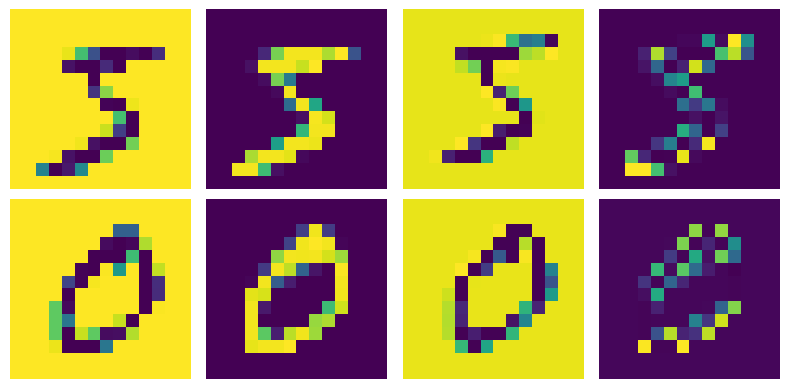

In [12]:
def plot_feature_maps(feature_maps, num_samples=5):
    """Visualizes the feature maps as heat maps for a given number of samples."""
    num_feature_maps = feature_maps.shape[-1]
    num_rows = num_samples
    num_cols = num_feature_maps

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_feature_maps * 2, num_rows * 2))

    for i in range(num_samples):
        for j in range(num_feature_maps):
            axs[i, j].imshow(feature_maps[i, :, :, j], cmap='viridis', interpolation='nearest')
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

plot_feature_maps(q_train_images, num_samples=2)

For title of comparaison, we create a fully classical model and apply it on the previous MNIST data

In [17]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=50,
    verbose=2,
)

Epoch 1/50
13/13 - 1s - 61ms/step - accuracy: 0.1000 - loss: 2.3480 - val_accuracy: 0.2333 - val_loss: 2.1823
Epoch 2/50
13/13 - 0s - 6ms/step - accuracy: 0.4400 - loss: 1.9512 - val_accuracy: 0.3667 - val_loss: 2.0290
Epoch 3/50
13/13 - 0s - 6ms/step - accuracy: 0.6200 - loss: 1.6667 - val_accuracy: 0.4667 - val_loss: 1.8880
Epoch 4/50
13/13 - 0s - 6ms/step - accuracy: 0.8000 - loss: 1.4275 - val_accuracy: 0.4667 - val_loss: 1.7612
Epoch 5/50
13/13 - 0s - 6ms/step - accuracy: 0.8000 - loss: 1.2268 - val_accuracy: 0.5000 - val_loss: 1.6523
Epoch 6/50
13/13 - 0s - 6ms/step - accuracy: 0.8800 - loss: 1.0603 - val_accuracy: 0.6000 - val_loss: 1.5616
Epoch 7/50
13/13 - 0s - 6ms/step - accuracy: 0.9000 - loss: 0.9228 - val_accuracy: 0.5667 - val_loss: 1.4868
Epoch 8/50
13/13 - 0s - 6ms/step - accuracy: 0.9200 - loss: 0.8087 - val_accuracy: 0.6000 - val_loss: 1.4246
Epoch 9/50
13/13 - 0s - 6ms/step - accuracy: 0.9400 - loss: 0.7135 - val_accuracy: 0.6333 - val_loss: 1.3725
Epoch 10/50
13/13 

And we achieved nearly the same results!

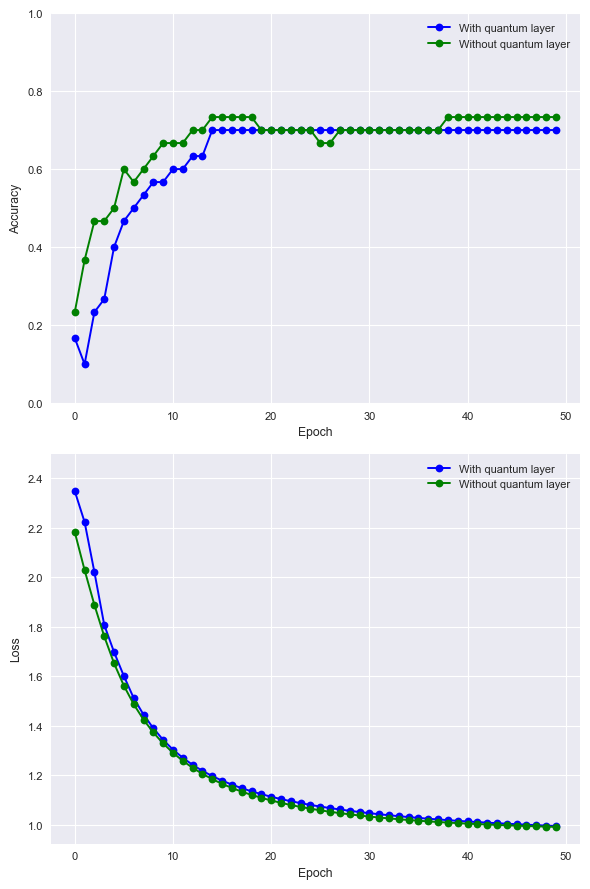

In [22]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

## Conclusion:

Quanvolutional Neural Networks (QNNs) are very promising approaches, where the results are nearly the same as classical methods but (at least theoretically) achieved with better training time. This difference can be very significant with large amounts of data, high dimensionality, and extensive computational requirements.

These advantages can't be practically realized while scaling up the size of data and qubits until better hardware is available. Until then, we must continue diving into this world of research, so when the hardware engineers are ready, we will be ready too.